<a href="https://colab.research.google.com/github/labilello/EA2-SOA/blob/master/HPC/Bilello_Leandro_ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introducción

En este ejemplo, se desarrolla un algoritmo tanto para CPU como para GPU de la aproximación de una funcion mediante el teorema de Taylor. El algoritmo planteado por el famoso matematico tiene la siguiente definicion:

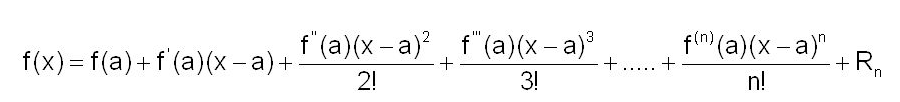

# 2. Armado del Ambiente

Debe configurar el entorno de ejecución como GPU.



# 3. Desarrollo

In [18]:
# --------------------------------------------
#@title 3.1 Parámetros de ejecución { vertical-output: true }

x0 =   1 #@param {type: "number"}
ev_in = 0.08 #@param {type: "number"}
func = 'cos(x)*sin(x)+100*x' #@param {type: "string"}
grado =   100 #@param {type: "number"}
# --------------------------------------------
%tensorflow_version 2.x
import tensorflow as tf
import timeit
from sympy import Derivative, diff, simplify
from sympy import *


device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nUsted no ha ejecutado el modulo de "Armado de Ambiente" o no ha configurado el entorno de ejecución como GPU')
  raise SystemError('Dispositivo GPU no encontrado')


x = symbols('x')
fx = eval( func )


tiempo_algoritmo = datetime.now()

coef = []

def cpu():
  with tf.device('/cpu:0'):
    coef.append( fx.subs(x, x0) )
    result = fx.subs(x, x0)

    for i in range(1, grado):
      derivada = ( Derivative(fx, x, i).doit() ) # Derivo la fc 
      derivada_ev = derivada.subs(x, x0) # Evaluo la derivada en x0
      factor = ( derivada_ev * ( x - x0 )**i ) / factorial(i) # Genero un factor de Taylor con los resultados obtenidos
      factor_ev = factor.subs(x, ev_in) # Evaluo el factor de Taylor en el valor a aproximar
      result += factor_ev

    return result

def gpu():
  with tf.device('/device:GPU:0'):
    coef.append( fx.subs(x, x0) )
    result = fx.subs(x, x0)

    for i in range(1, grado):
      derivada = ( Derivative(fx, x, i).doit() ) # Derivo la fc 
      derivada_ev = derivada.subs(x, x0) # Evaluo la derivada en x0
      factor = ( derivada_ev * ( x - x0 )**i ) / factorial(i) # Genero un factor de Taylor con los resultados obtenidos
      factor_ev = factor.subs(x, ev_in) # Evaluo el factor de Taylor en el valor a aproximar
      result += factor_ev

    return result
  
print( "RESULTADO TAYLOR CPU: ", cpu())
print( "RESULTADO TAYLOR GPU: ", gpu())


print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('Diferencia GPU vs CPU: {}x'.format(int(cpu_time/gpu_time)))

RESULTADO TAYLOR CPU:  -0.481991498076224*cos(1)**2 - 0.26596387560898*sin(1)*cos(1) + 0.481991498076224*sin(1)**2 + 8.0
RESULTADO TAYLOR GPU:  -0.481991498076224*cos(1)**2 - 0.26596387560898*sin(1)*cos(1) + 0.481991498076224*sin(1)**2 + 8.0
CPU (s):
2.6103393719999985
GPU (s):
2.6020934399998623
Diferencia GPU vs CPU: 1x


# 4. Tabla de Pasos

# 5. Conclusiones

# 6. Bibliografía
